In [3]:
# Outliers are extereme values

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [29]:
salary = (11, 12, 23, 24, 45, 56, 60, 67 , 45,90, 70, 61, 72, 83, 49)
len(salary)

15

In [6]:
# five point summary
# min, 25th, 50th, percentile, 100th, percentile

In [30]:
np.quantile(salary, [0, 0.25, 0.50, 0.75, 1])

array([11. , 34.5, 56. , 68.5, 90. ])

In [31]:
df = pd.DataFrame(salary, columns = ['salary'])
df

,salary
0,11
1,12
2,23
3,24
4,45
5,56
6,60
7,67
8,45
9,90


In [32]:
df.describe()

,salary
count,15.000000
mean,51.200000
std,24.666924
min,11.000000
25%,34.500000
50%,56.000000
75%,68.500000
max,90.000000


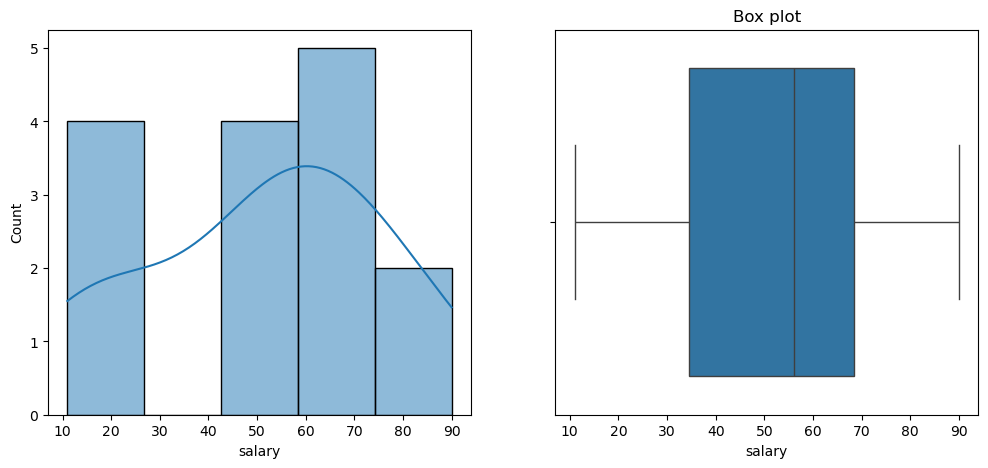

In [34]:
# how to check outliers, boxplot

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(df['salary'], kde =True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x = 'salary')
plt.title("Box plot")
plt.show()

In [35]:
# here the distributtion is not skewed as the outlier are preset an side
# in box plot, we see are outliers

# droping the outliers

# replace with mean and median

# cupping the outlier

In [ ]:
# dropping the outliers 

In [36]:
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)

IQR = q3-q1

lower_fence = q1-1.5*IQR
upper_fence = q3+1.5*IQR

In [37]:
df_filter = df[(df.salary >= lower_fence) & (df.salary <= upper_fence)]

In [38]:
df_filter.shape

(15, 1)

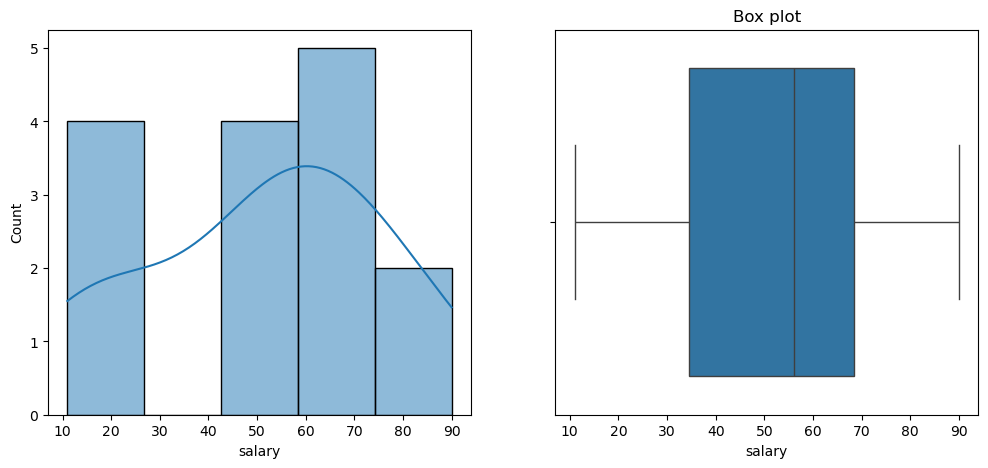

In [39]:
# how to check outliers, boxplot

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(df_filter['salary'], kde =True)

plt.subplot(1,2,2)
sns.boxplot(data=df_filter, x = 'salary')
plt.title("Box plot")
plt.show()

In [40]:
# imutation with mean and median 
df['salary_imuuted_mean'] = np.where((df.salary >= upper_fence) | (df.salary <= lower_fence), df['salary'].mean(), df['salary'])

In [41]:
df

,salary,salary_imuuted_mean
0,11,11.0
1,12,12.0
2,23,23.0
3,24,24.0
4,45,45.0
5,56,56.0
6,60,60.0
7,67,67.0
8,45,45.0
9,90,90.0


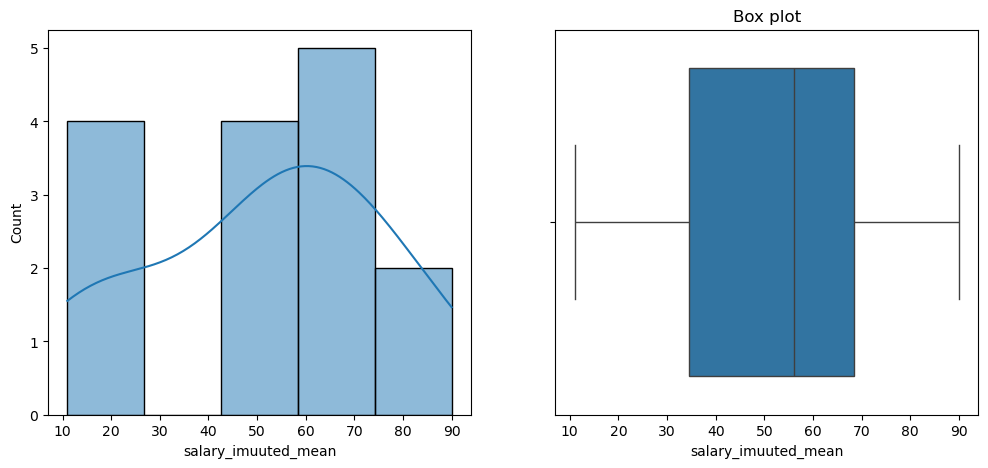

In [42]:

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(df['salary_imuuted_mean'], kde =True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x = 'salary_imuuted_mean')
plt.title("Box plot")
plt.show()

In [43]:
# imputation with median
df['salary_imuuted_median'] = np.where((df.salary >= upper_fence) | (df.salary <= lower_fence), df['salary'].median(), df['salary'])

In [44]:
df

,salary,salary_imuuted_mean,salary_imuuted_median
0,11,11.0,11.0
1,12,12.0,12.0
2,23,23.0,23.0
3,24,24.0,24.0
4,45,45.0,45.0
5,56,56.0,56.0
6,60,60.0,60.0
7,67,67.0,67.0
8,45,45.0,45.0
9,90,90.0,90.0


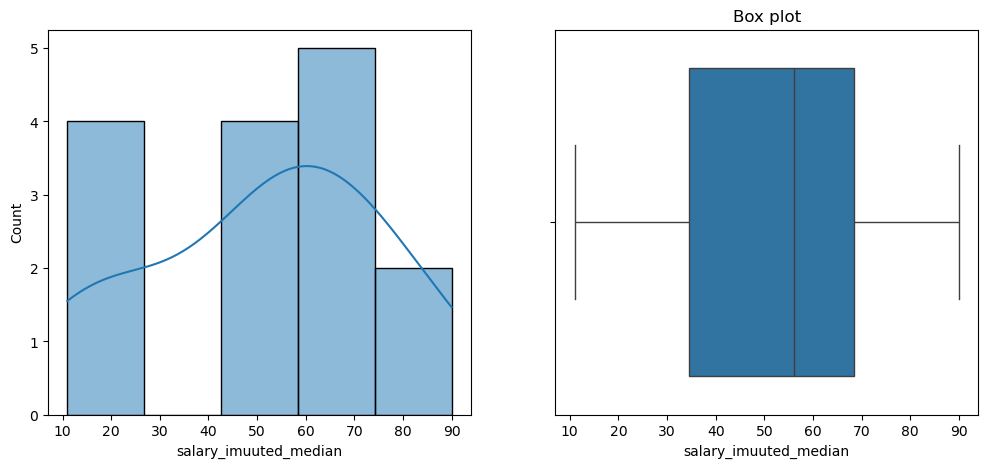

In [45]:

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(df['salary_imuuted_median'], kde =True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x = 'salary_imuuted_median')
plt.title("Box plot")
plt.show()

In [46]:
# cupping >> replacing the near value which is not outlier
df

,salary,salary_imuuted_mean,salary_imuuted_median
0,11,11.0,11.0
1,12,12.0,12.0
2,23,23.0,23.0
3,24,24.0,24.0
4,45,45.0,45.0
5,56,56.0,56.0
6,60,60.0,60.0
7,67,67.0,67.0
8,45,45.0,45.0
9,90,90.0,90.0


In [47]:
lower_cap = df['salary'].quantile(0.05) # lower cap sit percettile
upper_cap = df['salary'].quantile(0.95) # upper cap as percentile

In [48]:
lower_cap

11.7

In [49]:
upper_cap

85.1

In [50]:
# replace outliers with cap
# np.where(condityion, [x, y], /)
# Return elements chose from 'x' or 'y' depending on condition
# if df['salary'] < lower_cap satisfied then lower_cap  and df['salary']>upper_cap satisfied upper_cap
df["Salary_capped"] = np.where(df['salary'] < lower_cap, lower_cap,
       np.where(df['salary']>upper_cap, upper_cap, df['salary']))

In [51]:
df

,salary,salary_imuuted_mean,salary_imuuted_median,Salary_capped
0,11,11.0,11.0,11.7
1,12,12.0,12.0,12.0
2,23,23.0,23.0,23.0
3,24,24.0,24.0,24.0
4,45,45.0,45.0,45.0
5,56,56.0,56.0,56.0
6,60,60.0,60.0,60.0
7,67,67.0,67.0,67.0
8,45,45.0,45.0,45.0
9,90,90.0,90.0,85.1
